# Project Modul2 : Data Analytic
## Database : Sakila (Focused on Film)
### By : Risdan Kristori

# Context

A shop that provides DVD rental wants to know in general an overview of the business that has been running with its main service focus being the types of films that are rented in the shop. The store owners want to gain insights on how to increase customer satisfaction and increase store profits by providing the right types of films to the right consumers.

## Database Information 

Source : https://downloads.mysql.com/docs/sakila-db.zip

This database has the following tables:
- actor : contains information about the actors in the film.
- address : contains address information from consumers, staff and stores.
- category : contains movie categories
- city : contains a list of cities and countries according to the foreign key in the address table
- customer : contains all information about consumers
- film : contains a list of movies stored in the store
- film_actor : contains information about the film and the actor
- film_category : contains information about films and their categories
- film_text : contains information about film_id, title and description of the film
- inventory : contains information regarding film copies from each store
- languange : contains the languages in the film
- payment : contains payment information from consumers
- rental : contains information about the lease (who is renting, the time of the lease and the time of return)
- staff : contains information about staffs
- store : contains store manager and address information
- actor_info : contains a list of actors and films he/she played
- customer_list : contains a list of consumer information
- film_list : contains a list of movies with descriptions and actors
- nicer_but_slower_film_list : contains a list of movies with descriptions and actors
- sales_by_film_category : contains a list of sales by film category
- sales_by_store : contains a list of total sales by store
- staff_list : contains a list of staff in the store

## ERD Database Sakila 

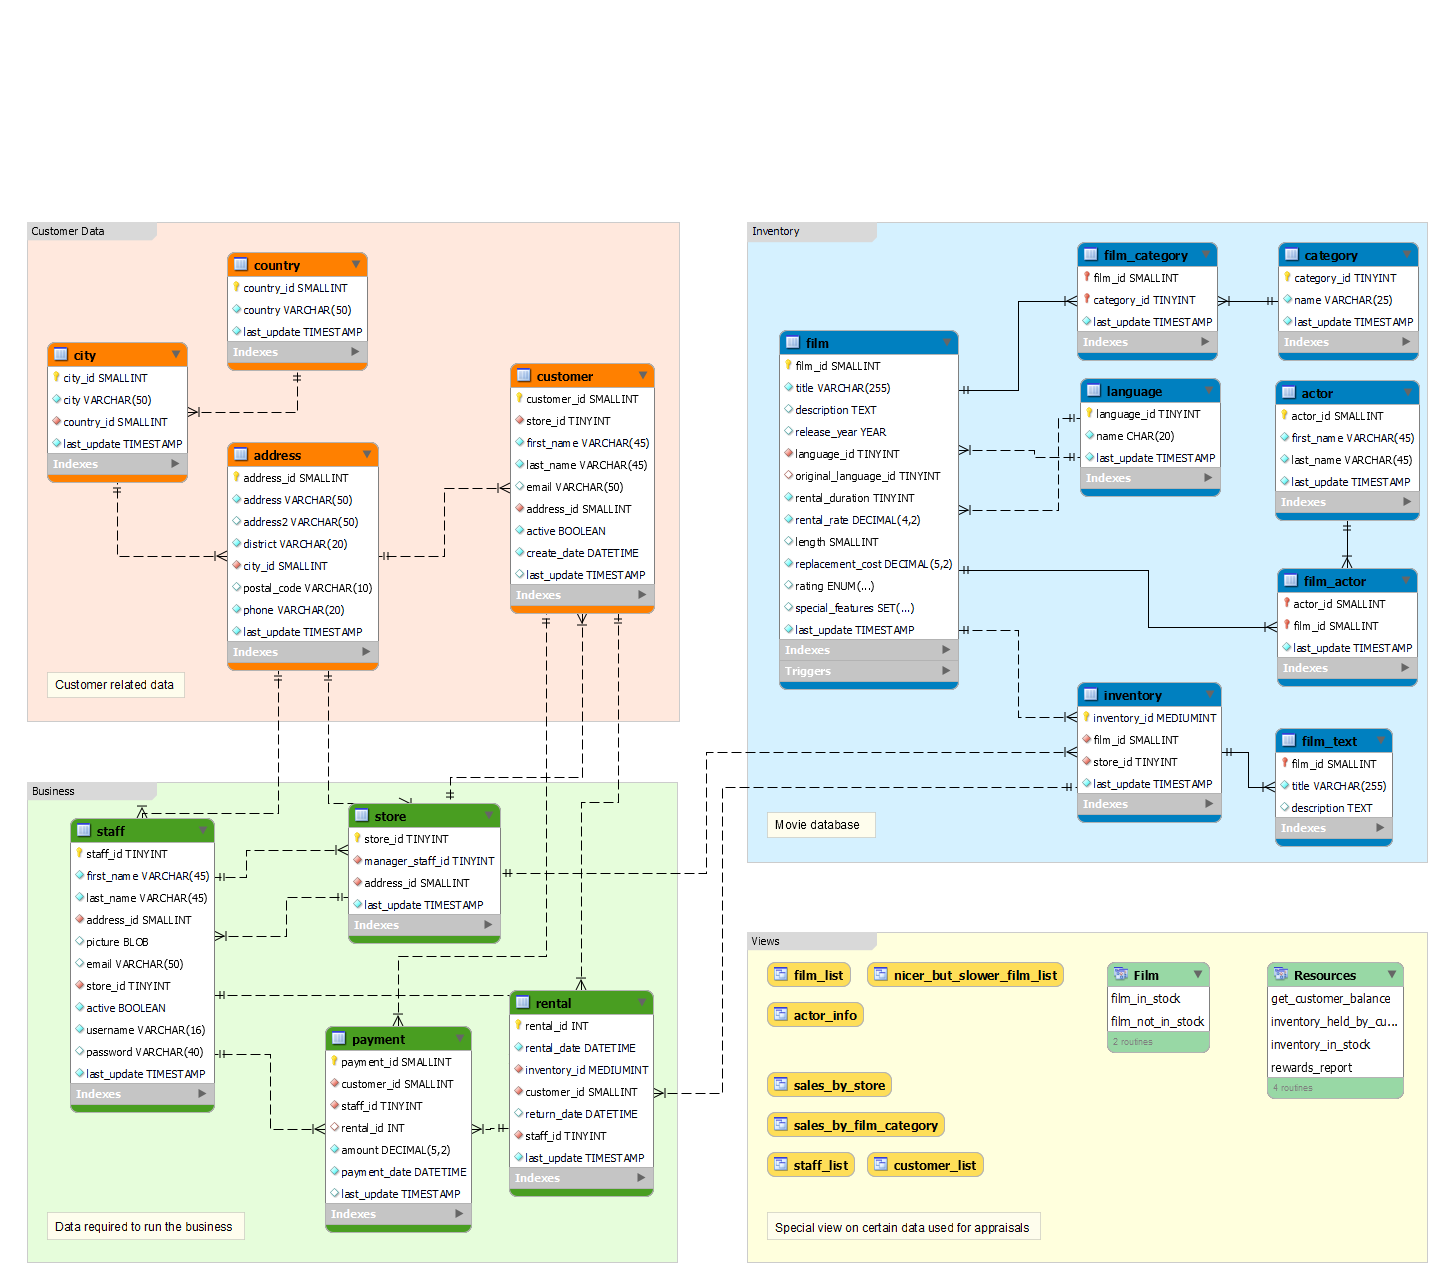

# Import Libraries and Data

In [3]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector as sqlcon
%matplotlib inline

In [4]:
# Make a connection to the sakila database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '*********',
    database = 'sakila'
)

The following is a function to execute SQL query via jupyter notebook. The output results are in the form of a dataframe that will be used to perform data analysis.

In [5]:
curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## Data Detail

The data that will be used for analysis are taken from tables that have a relationship with the film. There are 2 dataframes that will be used: the main data: film, and submain data: actor. The film contains data related to the film that is rented out while the actor contains data about the film and the actors who play the film.

The following is film data taken from the Sakila database.

In SQL query first is to create `Common Table Expression (CTE)` table sales_by_film_id which is taken from `payment`, `rental`, `inventory`, and `film` tables. The data taken here is the number of *amount* columns (the amount of rental payments and total payments) from the `payment` table which is collected based on *film_id* and the *film_id* column taken from the `film` table. Meanwhile, the `rental` and `inventory` tables are used to join the `payment` and `film` tables.

Then do a left join between the `film` table with the `category`, `film_list`, `language` and `CTE sales_by_film_id` tables. Then the data taken for analysis are as follows.

- film_id from film table
- title from film table
- description from film table
- release_year from film table
- rental_duration from film table
- rental_rate from film table
- length from film table
- replacement_cost from film table
- rating from film table
- special feature from film table
- last_update from film table
- category from category table
- name from language table, and
- sales from sales_by_film_id table
- rented from sales_by_film_id table

The following data is then created a dataframe with the name **film** with the index is film_id.

In [6]:
film = sql_table(
'''
-- CTE for sales_by_film
with sales_by_film_id as (
	select sum(p.amount) as sales, count(p.amount) as rented, i.film_id from 
	payment p
	left join rental r on p.rental_id = r.rental_id
	left join inventory i on r.inventory_id = i.inventory_id
	left join film f on i.film_id = f.film_id
	group by film_id
)

-- Table for analysis (focus at film)
select f.film_id, f.title, f.description, f.release_year, f.rental_duration, f.rental_rate, f.length, f.replacement_cost, f.rating, 
	f.special_features, f.last_update, c.name as category, l.name as language, sf.sales, sf.rented
from film f
left join film_category fc on f.film_id = fc.film_id
left join category c on fc.category_id = c.category_id
left join film_list fl on f.film_id = fl.FID
left join language l on f.language_id = l.language_id
left join sales_by_film_id sf on f.film_id = sf.film_id; 
'''
)

film.set_index('film_id', inplace = True)
film.head(3)

,title,description,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,category,language,sales,rented
film_id,,,,,,,,,,,,,,
1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,6,0.99,86,20.99,PG,"{Behind the Scenes, Deleted Scenes}",2006-02-15 05:03:42,Documentary,English,36.77,23.0
2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,3,4.99,48,12.99,G,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42,Horror,English,52.93,7.0
3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,7,2.99,50,18.99,NC-17,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42,Documentary,English,37.88,12.0


Next is the actor data taken from the Sakila database.

This data consists of a combination of several tables in the database, namely `film_actor`, `actor`, and `film`. The data taken are as follows

- film_id from film_actor table
- title from film table
- first_name from actor table
- last_name from= actor table

Then this data is loaded into a pandas dataframe with the name **actor**.

In [7]:
actor = sql_table(
'''
select fa.film_id, film.title, a.first_name, a.last_name 
from film_actor fa
left join actor a on fa.actor_id = a.actor_id
left join film on fa.film_id = film.film_id
'''
)

actor.head(5)

,film_id,title,first_name,last_name
0,1,ACADEMY DINOSAUR,PENELOPE,GUINESS
1,1,ACADEMY DINOSAUR,CHRISTIAN,GABLE
2,1,ACADEMY DINOSAUR,LUCILLE,TRACY
3,1,ACADEMY DINOSAUR,SANDRA,PECK
4,1,ACADEMY DINOSAUR,JOHNNY,CAGE


# Data Cleaning & Manipulation 

Before conducting data analysis, data cleaning and manipulation will be carried out first, the aim is to make the data easier to analyze and the information contained in it is not biased. Cleaning data manipulation consists of handling `missing data`, `outlier`, `incompatible data format` and `feature engineering`. Here will be seen the main data information as follows.

In [8]:
film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 14 columns):
title               1000 non-null object
description         1000 non-null object
release_year        1000 non-null int64
rental_duration     1000 non-null int64
rental_rate         1000 non-null object
length              1000 non-null int64
replacement_cost    1000 non-null object
rating              1000 non-null object
special_features    1000 non-null object
last_update         1000 non-null datetime64[ns]
category            1000 non-null object
language            1000 non-null object
sales               958 non-null object
rented              958 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 117.2+ KB


### Analisis Komposisi Data

Judging from the composition of the data above, the data consists of 14 columns and 1000 data. There are 4 types of data in a dataframe, namely *object, int, float and datetime*.

There are 2 columns that do not have a complete 1000 data, namely the `rented` and `sales` columns, the possibility is that there is *missing data* in each of these columns.

In addition, the `replacement_cost`, `rental_rate` and `sales` data types are object, whereas the three columns should have numeric data types, so it is necessary to change the type of the data column. There is also a `rented` column which should be an integer data type, this column will also be changed to what was previously a float to an integer.

In the data there is also a `special_feature` column which has a data type *set* (as seen from the curly braces on the data), so it will be difficult to analyze. We will then change this data to a string type to make it easier to process the data.

In [9]:
actor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462 entries, 0 to 5461
Data columns (total 4 columns):
film_id       5462 non-null int64
title         5462 non-null object
first_name    5462 non-null object
last_name     5462 non-null object
dtypes: int64(1), object(3)
memory usage: 170.8+ KB


In the actor dataframe there are 4 columns containing 5462 data. From the four columns, there is film_id data which is of integer data type and the other is of object data type. From the information above, it can be seen that this dataframe does not have a missing value and the existing data types are appropriate.

### Handling Missing Value 

Before analyzing the data, it is better to make improvements to the data that still has a *missing value*. The *missing value* value can be seen from the following function.

In [10]:
# Percentage missing value in main data

film.isnull().sum() * 100 / len(film)

title               0.0
description         0.0
release_year        0.0
rental_duration     0.0
rental_rate         0.0
length              0.0
replacement_cost    0.0
rating              0.0
special_features    0.0
last_update         0.0
category            0.0
language            0.0
sales               4.2
rented              4.2
dtype: float64

There are two columns that have *missing values*, namely `rented` and `sales`.

In the 'sales' column, there are 42 data (4.2%) missing values, this is because there is no rental value data on the film, therefore the missing value will be replaced with zero (0) which indicates that there is no rental result from the film.

Just like the `sales` column, the `rented` column has a missing value because there is no borrower data for the film. So we replace the missing value with zero (0).

In [11]:
# Mengganti nilai NaN pada kolom sales dan rented dengan nilai nol (0)
film['sales'].fillna(0, inplace=True)
film['rented'].fillna(0, inplace=True)

After the repair is done, check the *missing value* on each dataframe.

In [12]:
# Cek kembali missing values pada data utama
print('Missing Value in Film Dataframe')
print(film.isnull().sum())
print('\n')
print('Missing Value in Actor Dataframe')
print(actor.isnull().sum())

Missing Value in Film Dataframe
title               0
description         0
release_year        0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
special_features    0
last_update         0
category            0
language            0
sales               0
rented              0
dtype: int64


Missing Value in Actor Dataframe
film_id       0
title         0
first_name    0
last_name     0
dtype: int64


After handling the *missing value* and then checking it again, it can be seen that the film and actor data no longer contains *missing value*. *Missing value* is not only about NaN or empty data, it is possible that the missing value may contain undetermined values, mybe it numeric (eg 0 or -1) or string (eg ? or None), because in future data analysis if unique data is found that does not fit the existing context, it can be reviewed again to be handled as *missing value*.

### Handling Wrong Datatype

Previously, it has been explained that there are several data from film dataframes that have inappropriate data formats, namely `rental_rate`, `replacement_cost`, `sales`, `special_features` and `rented`. Before the data is analyzed, improvements should be made by changing to the appropriate type for the data.

In [13]:
film['rental_rate'] = pd.to_numeric(film['rental_rate'])
film['replacement_cost'] = pd.to_numeric(film['replacement_cost'])
film['sales'] = pd.to_numeric(film['sales'])

# Mengubah tipe data ke string
film['special_features'] = film['special_features'].apply(lambda x : str(x))

# Mengubah tipe data ke integer
film['rented'] = film['rented'].apply(lambda x : int(x))

In [14]:
# Cek kembali informasi data
film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 14 columns):
title               1000 non-null object
description         1000 non-null object
release_year        1000 non-null int64
rental_duration     1000 non-null int64
rental_rate         1000 non-null float64
length              1000 non-null int64
replacement_cost    1000 non-null float64
rating              1000 non-null object
special_features    1000 non-null object
last_update         1000 non-null datetime64[ns]
category            1000 non-null object
language            1000 non-null object
sales               1000 non-null float64
rented              1000 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 117.2+ KB


### New Feature: price_per_day 

The `rental_rate` column is the rental price that must be paid for the rental with the number of days listed in the `rental_duration` column. The value in the `rental_duration` column is different for each film, therefore a new column is created, namely price_per_day which is the rental price per day for each film.

The price_per_day value is the value of `rental_rate` divided by `rental_duration`.

In [15]:
film['price_per_day'] = film['rental_rate']/film['rental_duration']
film['price_per_day'] = round(pd.to_numeric(film['price_per_day']),2)

### New Feature : name and Data Duplicate

In the actor dataframe there are two column names, first_name and last_name, to make it easier, these two columns will be combined into one, namely the name column. The column's name will contain the full names of each actor in the film for rent at the store.

In [16]:
actor['name'] = actor['first_name']+' '+actor['last_name']

In [17]:
actor.head(2)

,film_id,title,first_name,last_name,name
0,1,ACADEMY DINOSAUR,PENELOPE,GUINESS,PENELOPE GUINESS
1,1,ACADEMY DINOSAUR,CHRISTIAN,GABLE,CHRISTIAN GABLE


The new name column adds one column to the actor data frame. It can be seen that with the name column, fist_name and last_name columns are not needed because they have the same contents, this shows the existence of **duplicate data**. Therefore the first_name and last_name columns will be removed from the actor data frame.

In [18]:
actor.drop(['first_name','last_name'], axis = 1, inplace=True)
actor.head(2)

,film_id,title,name
0,1,ACADEMY DINOSAUR,PENELOPE GUINESS
1,1,ACADEMY DINOSAUR,CHRISTIAN GABLE


### Handling Outliner (Film)

Before we analyze the existing data, we should first check the outlier data. Outlier data can be obtained by several techniques, one of which is the visualization technique using boxplots. There are 6 columns to check with the boxplot namely `rental_duration`, `rental_rate`, `length`, `rented`, `replacement_cost` and `sales`. Each of those columns is numeric data.

Text(0.5, 0, 'Dollar')

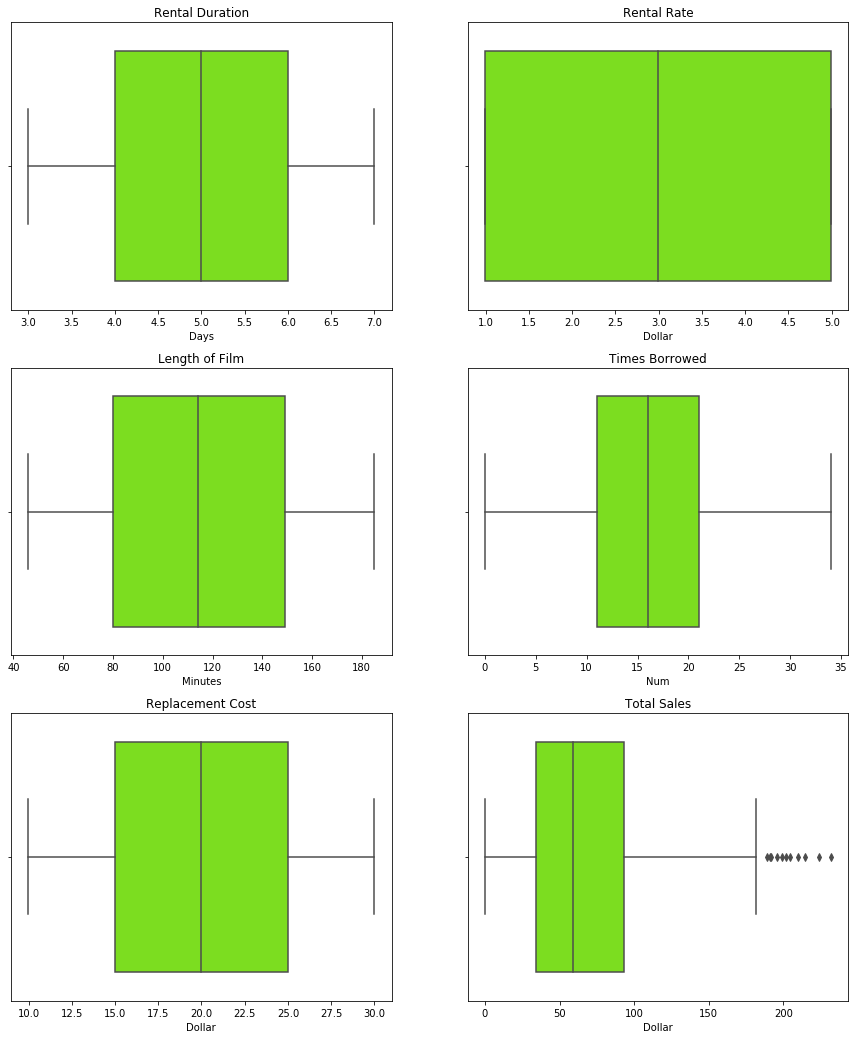

In [19]:
plt.figure(figsize=(15,18))
plt.subplot(3,2,1)
sns.boxplot(film['rental_duration'], color='lawngreen')
plt.title('Rental Duration')
plt.xlabel('Days')
plt.subplot(3,2,2)
sns.boxplot(film['rental_rate'], color='lawngreen')
plt.title('Rental Rate')
plt.xlabel('Dollar')
plt.subplot(3,2,3)
sns.boxplot(film['length'], color='lawngreen')
plt.title('Length of Film')
plt.xlabel('Minutes')
plt.subplot(3,2,4)
sns.boxplot(film['rented'], color='lawngreen')
plt.title('Times Borrowed')
plt.xlabel('Num')
plt.subplot(3,2,5)
sns.boxplot(film['replacement_cost'], color='lawngreen')
plt.title('Replacement Cost')
plt.xlabel('Dollar')
plt.subplot(3,2,6)
sns.boxplot(film['sales'], color='lawngreen')
plt.title('Total Sales')
plt.xlabel('Dollar')

In [20]:
Q1_sales = film['sales'].describe()['25%']
Q3_sales = film['sales'].describe()['75%']
IQR_sales = Q3_sales - Q1_sales

outlier_index = film[(film['sales'] < Q1_sales - (1.5 * IQR_sales)) | (film['sales']> Q3_sales + (1.5 *IQR_sales)) ].index
film.loc[outlier_index]

,title,description,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,category,language,sales,rented,price_per_day
film_id,,,,,,,,,,,,,,,
369,GOODFELLAS SALUTE,A Unbelieveable Tale of a Dog And a Explorer w...,2006,4,4.99,56,22.99,PG,{'Deleted Scenes'},2006-02-15 05:03:42,Sci-Fi,English,209.69,31,1.25
403,HARRY IDAHO,A Taut Yarn of a Technical Writer And a Femini...,2006,5,4.99,121,18.99,PG-13,"{'Deleted Scenes', 'Commentaries'}",2006-02-15 05:03:42,Drama,English,195.70,30,1.00
444,HUSTLER PARTY,A Emotional Reflection of a Sumo Wrestler And ...,2006,3,4.99,83,22.99,NC-17,"{'Behind the Scenes', 'Trailers', 'Commentaries'}",2006-02-15 05:03:42,Comedy,English,190.78,22,1.66
460,INNOCENT USUAL,A Beautiful Drama of a Pioneer And a Crocodile...,2006,3,4.99,178,26.99,PG-13,"{'Behind the Scenes', 'Trailers', 'Deleted Sce...",2006-02-15 05:03:42,Foreign,English,191.74,26,1.66
670,PELICAN COMFORTS,A Epic Documentary of a Boy And a Monkey who m...,2006,4,4.99,48,17.99,PG,"{'Deleted Scenes', 'Commentaries'}",2006-02-15 05:03:42,Documentary,English,188.74,26,1.25
764,SATURDAY LAMBS,A Thoughtful Reflection of a Mad Scientist And...,2006,3,4.99,150,28.99,G,"{'Deleted Scenes', 'Commentaries'}",2006-02-15 05:03:42,Sports,English,204.72,28,1.66
879,TELEGRAPH VOYAGE,A Fateful Yarn of a Husband And a Dog who must...,2006,3,4.99,148,20.99,PG,{'Commentaries'},2006-02-15 05:03:42,Music,English,231.73,27,1.66
893,TITANS JERK,A Unbelieveable Panorama of a Feminist And a S...,2006,4,4.99,91,11.99,PG,{'Behind the Scenes'},2006-02-15 05:03:42,Sci-Fi,English,201.71,29,1.25
897,TORQUE BOUND,A Emotional Display of a Crocodile And a Husba...,2006,3,4.99,179,27.99,G,"{'Trailers', 'Commentaries'}",2006-02-15 05:03:42,Drama,English,198.72,27,1.66


From the results of the above plot, it can be seen that the `rental_duration`, `rental_rate`, `length`, `rented` and `replacement_cost` columns do not have outliers, what is unique is the `rental_rate` data where the minimum and maximum values of the data are equal to the 1st quartile value and quartile 3, indicating that there is not much variation in the data. The column that has an outlier value from the above plot is the `sales` column, shown on the boxplot there are outlier points outside the ends of the box plot.

Then the film data that has a `sales` value is displayed which includes outliers. These films are films with high rental values. In future data analysis, the outlier value in `sales` will not be removed because it is not a data error, but it is due to the high consumer interest in the film.

If in the next project a Machine Learning algorithm model will be made to predict the value of the rental results, it is necessary to consider scaling so that the outlier value does not damage the actual model.

### Handling Outlier (actor) 

In the actor data frame, there is no numerical data to be analyzed for outlier values, therefore this data frame will be grouped based on the actor playing the film, so that performance data is obtained, which contains the number of performances in the film played by each actor. Then we will examine this data for outlier values.

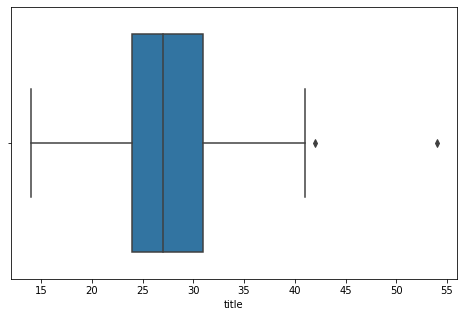

In [21]:
performance = actor.groupby('name').count()
plt.figure(figsize=(8,5))
sns.boxplot(performance['title'])

In [22]:
Q1_perf = performance['title'].describe()['25%']
Q3_perf = performance['title'].describe()['75%']
IQR_perf = Q3_perf - Q1_perf

outlier_index = performance[(performance['title'] < Q1_perf - (1.5 * IQR_perf)) | (performance['title']> Q3_perf + (1.5 *IQR_perf)) ].index
performance.loc[outlier_index]

,film_id,title
name,,
GINA DEGENERES,42,42
SUSAN DAVIS,54,54


There are 2 outlier values from the performance values in the actor table. Just like before, this outlier value does not indicate an anomaly or error value, therefore we will still use it to analyze the data.

## Review Data Summary 

In the following, we will see the composition of the data accompanied by the missing and unique values of each column

In [23]:
listItem = []

for col in film.columns:
    listItem.append([col, film[col].dtype, len(film),film[col].isna().sum(),
        round((film[col].isna().sum()/len(film[col])) * 100,2), film[col].nunique()])

FilmDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique'],data=listItem)

FilmDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique
0,title,object,1000,0,0.0,1000
1,description,object,1000,0,0.0,1000
2,release_year,int64,1000,0,0.0,1
3,rental_duration,int64,1000,0,0.0,5
4,rental_rate,float64,1000,0,0.0,3
5,length,int64,1000,0,0.0,140
6,replacement_cost,float64,1000,0,0.0,21
7,rating,object,1000,0,0.0,5
8,special_features,object,1000,0,0.0,15
9,last_update,datetime64[ns],1000,0,0.0,1


From the table information above it can be seen that the `release_year`, `last_update` and `language` columns in the table have only 1 unique value which indicates that the data is the same for all films. Because of that, we will delete this column because there is not much information that can be extracted through it.

In [24]:
film.drop(['release_year','last_update','language'], axis=1, inplace=True)

In [25]:
listItem = []

for col in actor.columns:
    listItem.append([col, actor[col].dtype, len(actor),actor[col].isna().sum(),
        round((actor[col].isna().sum()/len(actor[col])) * 100,2), actor[col].nunique()])

ActorDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique'],data=listItem)

ActorDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique
0,film_id,int64,5462,0,0.0,997
1,title,object,5462,0,0.0,997
2,name,object,5462,0,0.0,199


From the table above, it can be seen that the number of films in the actor data is not the same as the film data (more in films) this shows that there are films whose actors are unknown (NaN). It is also known that the total actors who played the film were 199 people.

After all the data has been cleaned then proceed to analyze the data. In analyzing the data, the visualization contained in the python library will be used because the data already loaded in the form of a data frame contained in python. The data here is also visualized using Tabblue Public which can be seen at the following address.

Visualization Using Tablue: https://public.tableau.com/app/profile/risdan/viz/PenyewaanFilmSakila/DataPenyewaanFilmSakila?publish=yes

# Data Visualization

After the film data has been cleaned of any anomalies (missing values, wrong datatype, outliers) then the data will be ready for our analysis. In analyzing the next data visualization data will be used because it will be easier to understand and conclusions and insights will be drawn which will be useful for DVD rental shops.

## Top 5

### Top Sales 5 Film 

The following are films with the most rental results, judging by the rental value they generate. 5 films with the largest rental value will be taken.

Text(0, 0.5, 'USD')

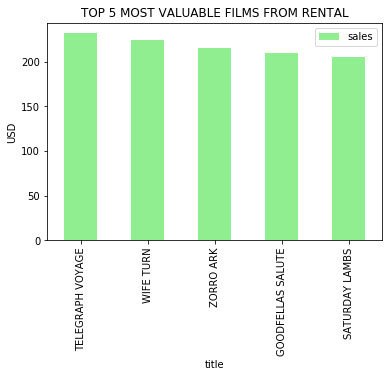

In [63]:
ax = film.sort_values(by='sales', ascending=False).head(5)[['title','sales']].plot(kind='bar', x='title', color='lightgreen', title='TOP 5 MOST VALUABLE FILMS FROM RENTAL')
ax.set_ylabel('USD')

Text(0.5, 1.0, 'TOP 5 MOST RENTED FILMS')

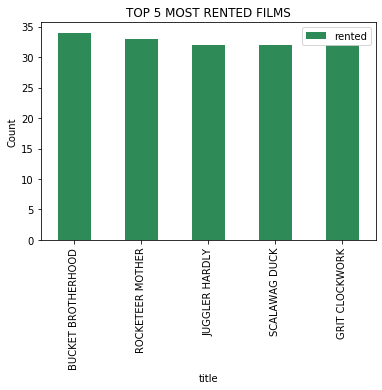

In [67]:
#plt.figure(figsize=(12,6))
ax = film.sort_values(by='rented', ascending=False).head(5)[['title','rented']].plot(kind='bar', x='title', color='seagreen')
ax.set_ylabel('Count')
ax.set_title('TOP 5 MOST RENTED FILMS')

It was found that films with the title: TELEGRAPH VOYAGE, WIFE TURN, ZORRO ARK, GOODFELLAS SALUTE and SATURDAY LAMBS had the highest rental values. The categories owned by these five films are also different so that it cannot be generalized that films with certain categories are attractive to rent by consumers.

Then the following are films that have not/have no rental results until this data is taken.

In [28]:
film[film['sales']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 14 to 955
Data columns (total 12 columns):
title               42 non-null object
description         42 non-null object
rental_duration     42 non-null int64
rental_rate         42 non-null float64
length              42 non-null int64
replacement_cost    42 non-null float64
rating              42 non-null object
special_features    42 non-null object
category            42 non-null object
sales               42 non-null float64
rented              42 non-null int64
price_per_day       42 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 4.3+ KB


42 films have never been rented by consumers. Furthermore, staff can further promote the following films to attract the attention of consumers, or it can be investigated why the film is not yet in demand by consumers. This can be caused by several things, it could be that the location of the film is difficult for consumers to reach in the store or other things that make it difficult to obtain information about the film.

### Top 5 Sales Film Groupby Category  

Text(0.5, 1.0, 'COUNT OF FILM RENTAL PER CATEGORY')

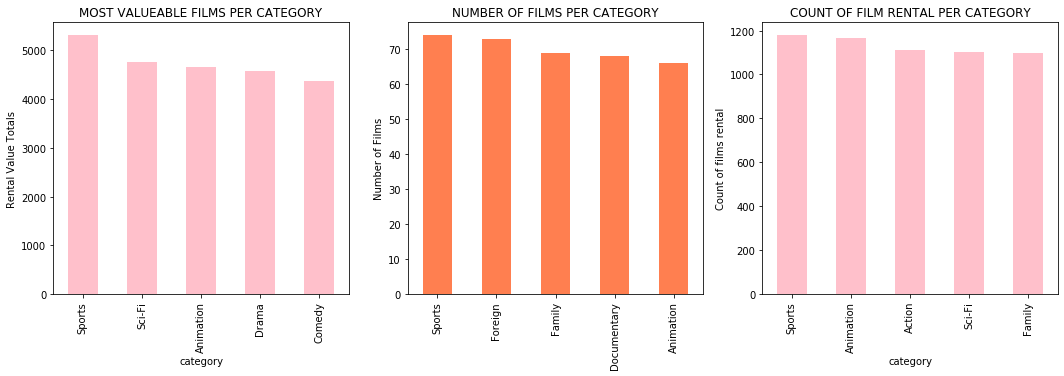

In [75]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.ylabel('Rental Value Totals')
film.groupby(by='category').sum().sort_values(by='sales',ascending=False)['sales'].head(5).plot(kind='bar', color='pink')
plt.title('MOST VALUEABLE FILMS PER CATEGORY')
plt.subplot(1,3,2)
plt.ylabel('Number of Films')
film.category.value_counts()[:5].plot(kind='bar', color='coral')
plt.title('NUMBER OF FILMS PER CATEGORY')
plt.subplot(1,3,3)
plt.ylabel('Count of films rental')
film.groupby(by='category').sum().sort_values(by='rented',ascending=False)['rented'].head(5).plot(kind='bar', color='pink')
plt.title('COUNT OF FILM RENTAL PER CATEGORY')

From the results of the graph above, it can be concluded that films in the sports, sci-fi, animation, drama and comedy categories produce the highest rental values, but in contrast to the highest number of rentals, there are films with more attractive sports, animation, action, sci-fi and family categories. consumer attention. There are 2 different categories, namely drama and comedy in the top 5 sales (rental results), action and family in the top 5 films with the highest number of rentals. This shows that films in the drama and comedy categories have a higher average rental value than films in the action and family categories. Another thing to note is that films with the 3 largest rental values ​​are not included in the total 5 highest total films based on categories, namely sci-fi, drama and comedy.

In [30]:
film.groupby('category').mean()['rental_rate'].sort_values(ascending=False)

category
Games          3.252295
Travel         3.235614
Sci-Fi         3.219508
Comedy         3.162414
Sports         3.125135
New            3.116984
Foreign        3.099589
Horror         3.025714
Drama          3.022258
Music          2.950784
Children       2.890000
Animation      2.808182
Family         2.758116
Classics       2.744386
Documentary    2.666471
Action         2.646250
Name: rental_rate, dtype: float64

In this case, the shop owner can have 2 options to increase rentals, namely by slightly increasing the rental price for films in the action and family categories (while maintaining customer interest in films in these categories) or by increasing the number of collections of drama and comedy films.

### Top 5 Most Rented Film

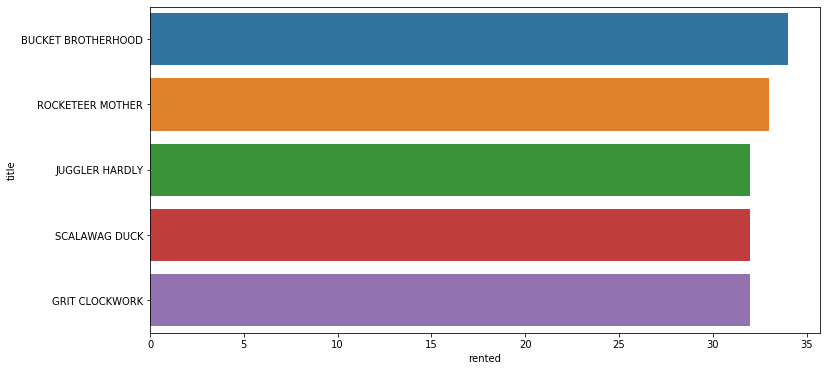

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(data = film.sort_values(by='rented', ascending=False)[:5], x='rented', y='title')

The plots above are films that are in great demand by customers for rent, it can be seen that films with the titles Bucket Brotherhood and Rocketeer Mother are the 2 most rented films. To take advantage of this result, store owners or staff can add more copies so that the opportunity for customers to rent films is greater and the profits obtained are also greater. Apart from that, you can also increase the rental price for the best-selling films to get more profit from the film.

## Expensive Film Rental Rate per Day 

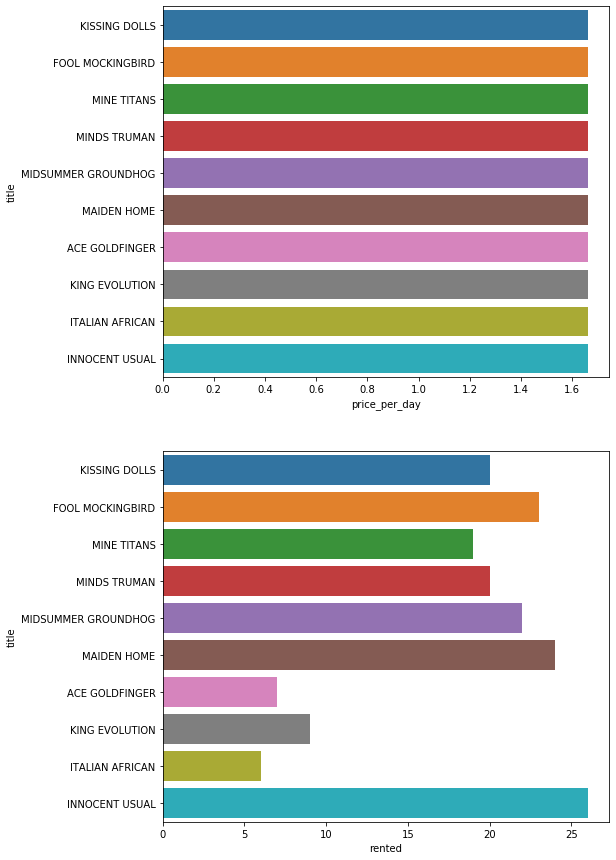

In [73]:
plt.figure(figsize=(8,15))
plt.subplot(2,1,1)
sns.barplot(data = film.sort_values(by='price_per_day', ascending=False)[:10], x='price_per_day', y='title')
plt.subplot(2,1,2)
sns.barplot(data = film.sort_values(by='price_per_day', ascending=False)[:10], x='rented', y='title')

The plot above is 10 films with the highest rental value per day accompanied by the amount of rent owned by each film. It can be seen that there are 3 films that have a high rental value while the number of rentals produced is below 10 times. The insight gained from the plot is that the shop owner can lower the rent a little to make it more affordable for customers and increase customer interest in the film.

## Film Duration and Rented 

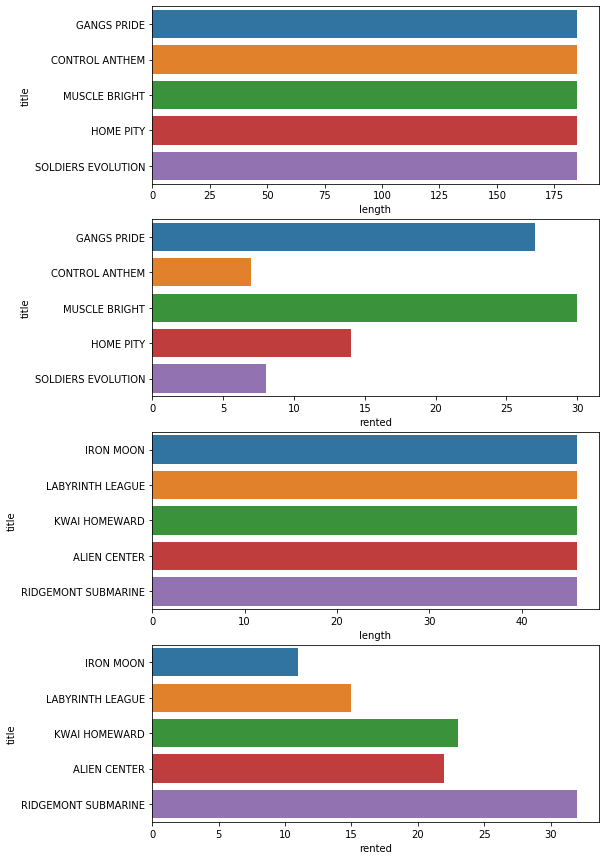

In [33]:
plt.figure(figsize=(8,15))
plt.subplot(4,1,1)
sns.barplot(data = film.sort_values(by='length', ascending=False)[:5], x='length', y='title')
plt.subplot(4,1,2)
sns.barplot(data = film.sort_values(by='length', ascending=False)[:5], x='rented', y='title')
plt.subplot(4,1,3)
sns.barplot(data = film.sort_values(by='length')[:5], x='length', y='title')
plt.subplot(4,1,4)
sns.barplot(data = film.sort_values(by='length')[:5], x='rented', y='title')

The plot above is a comparison between the films with the longest duration and the shortest duration along with the number of rentals from these films. From the plot above, it cannot be ascertained that customers are more interested in films with a long or short duration.

## Actor With Most Performance

Text(0.5, 1.0, 'ACTOR WITH MOST PERFORMANCE')

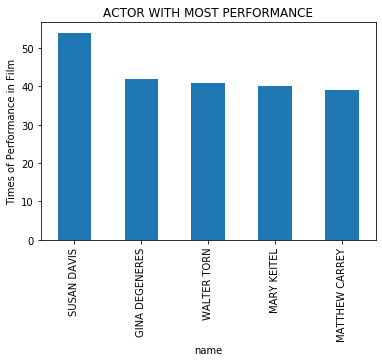

In [77]:
ax = performance.sort_values('title', ascending=False)[:5]['title'].plot(kind='bar')
ax.set_ylabel('Times of Performance in Film')
ax.set_title('ACTOR WITH MOST PERFORMANCE')

The plot above shows that 5 actors have the highest number of performances, namely Susan Davis, Gina Degerares, Walter Torn, Mary Keitel, and Matthew Carrey. To get a deeper insight, we will look at the rental value generated by the films played by these actors.

In [35]:
most_performance = ['SUSAN DAVIS', 'GINA DEGENERES', 'WALTER TORN', 'MARY KEITEL', 'MATTHEW CARREY']

list_film = []
for item in most_performance:
    for i in actor[actor['name']==item].film_id.values:
        list_film.append([item, film.loc[i]['title'], film.loc[i]['sales'], film.loc[i]['rented']])

Top_5_Actor = pd.DataFrame(columns=['actor','title','sales','rented'],data=list_film)
    

Text(0, 0.5, 'Number of Rental')

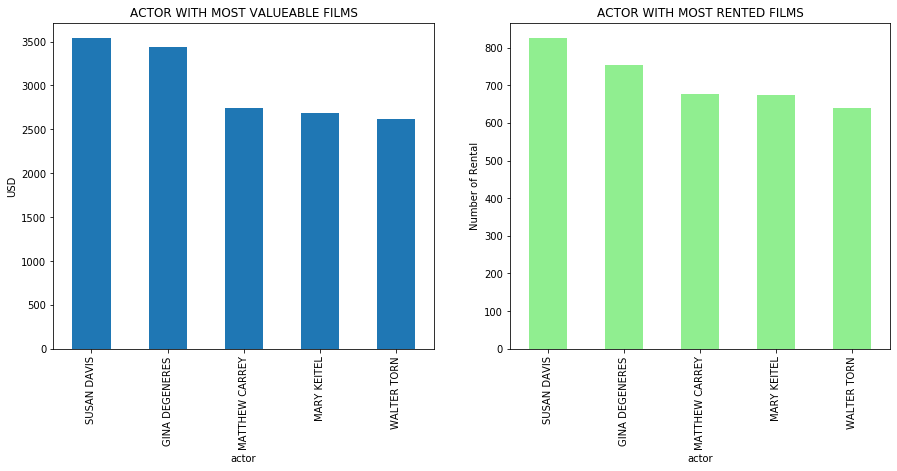

In [82]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
Top_5_Actor.groupby('actor').sum()['sales'].sort_values(ascending=False).plot(kind='bar')
plt.title('ACTOR WITH MOST VALUEABLE FILMS')
plt.ylabel('USD')
plt.subplot(1,2,2)
Top_5_Actor.groupby('actor').sum()['rented'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('ACTOR WITH MOST RENTED FILMS')
plt.ylabel('Number of Rental')

It can be seen from the plot above that the film with the actors with the most performances in the film is also quite in demand by customers and also generates a large rental value. The insight obtained from this data is that the shop owner or staff can increase sales by adding a collection of films with these actors, especially the actor by the name of 'Matthew Carrey' who even though he ranks 5th for performance but reaches third place in the value of rent and revenue. including the third order that customers are interested in (for top 5 performance).

# Statistika : Uji Statistik dan Korelasi 

In [37]:
# Rent values normality test (sales)

from scipy.stats import shapiro

norm, pval = shapiro(film['sales'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUS NORMAL')


Tolak H0 Karena P-Value (5.454752552230295e-17 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


In [38]:
# Rent amount normality test (rented)

from scipy.stats import shapiro

norm, pval = shapiro(film['rented'])

if pval < 0.05 :
    print (f'Reject H0 Due to P-Value ({pval} < 5%)')
    print ('DATA IS NOT NORMALLY DISTRIBUTED')
else :
    print (f'Failed to Reject H0 Due to P-Value ({pval} > 5%)')
    print ('DATA IS NORMALLY DISTRIBUTED')


Reject H0 Due to P-Value (1.4380324842022674e-07 < 5%)
DATA IS NOT NORMALLY DISTRIBUTED


From the statistical test results above, it is known that the sales value and the rented value are not normally distributed. This leads to the Kruskal Walls test which will be used next to test the rental value by category, rating and rental_rate.

In [39]:
# Uji Perbandingan Nilai Hasil Sewa berdasarkan 5 Kategori Film terbanyak (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    film[film['category'] == 'Sports']['sales'],
    film[film['category'] == 'Foreign']['sales'],
    film[film['category'] == 'Documentary']['sales'],
    film[film['category'] == 'Family']['sales'],
    film[film['category'] == 'Animation']['sales']
) 

if pvalkrus < 0.05 :
    print (f'Reject H0 Due to P-Value ({pvalkrus} < 5%)')
    print ('There are differences in rental yields for each film with the existing categories')
else :
    print (f'Failed to Reject H0 Due to P-Value ({pvalkrus} > 5%)')
    print ('No differences in rental yields for each film with the existing categories')

Failed to Reject H0 Due to P-Value (0.07372590090201608 > 5%)
No differences in rental yields for each film with the existing categories


The results of the Kruskal Wall test on rental yields for the 5 categories with the highest number of films show that there is no difference. This shows that certain categories do not have much effect on the rental value.

In [40]:
# Uji Perbandingan Banyaknya Sewa berdasarkan 5 Kategori Film terbanyak (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    film[film['rating'] == 'PG-13']['rented'],
    film[film['rating'] == 'NC-17']['rented'],
    film[film['rating'] == 'R']['rented'],
    film[film['rating'] == 'PG']['rented'],
    film[film['rating'] == 'G']['rented']
) 

if pvalkrus < 0.05 :
    print (f'Reject H0 Due to P-Value ({pvalkrus} < 5%)')
    print ('There is a difference in the number of rentals for each film with the existing rating')
else :
    print (f'Failed to Reject H0 Due to P-Value ({pvalkrus} > 5%)')
    print ('There is no difference in the number of rentals for each film with the existing rating')

Failed to Reject H0 Due to P-Value (0.4507682055542722 > 5%)
There is no difference in the number of rentals for each film with the existing rating


The results of the Kruskal Wall test on the number of rentals for 5 types of film ratings show that there is no difference. This shows that certain ratings do not have much effect on the value of rental results.

In [41]:
# Uji Perbandingan Nilai Hasil Sewa berdasarkan Rental_Rate (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    film[film['rental_rate'] == 0.99]['sales'],
    film[film['rental_rate'] == 2.99]['sales'],
    film[film['rental_rate'] == 4.99]['sales']
) 

if pvalkrus < 0.05 :
    print (f'Reject H0 Due to P-Value ({pvalkrus} < 5%)')
    print ('There is a difference in the rental value for each film')
else :
    print (f'Failed to Reject H0 Due to P-Value ({pvalkrus} > 5%)')
    print ('There is a no difference in the rental value for each film')

Reject H0 Due to P-Value (6.670075118432135e-71 < 5%)
There is a difference in the rental value for each film


From the results of the Kruskal Wall test on rental yields based on rental_rate, it shows that there is a large influence on rental rates on rental yields. This is also addressed by the following heatmap below, where the correlation between rental_rate and sales is 56%.

Text(0.5, 1, 'VARIABLE CORRELATION FROM FILMS IN RENTAL STORE')

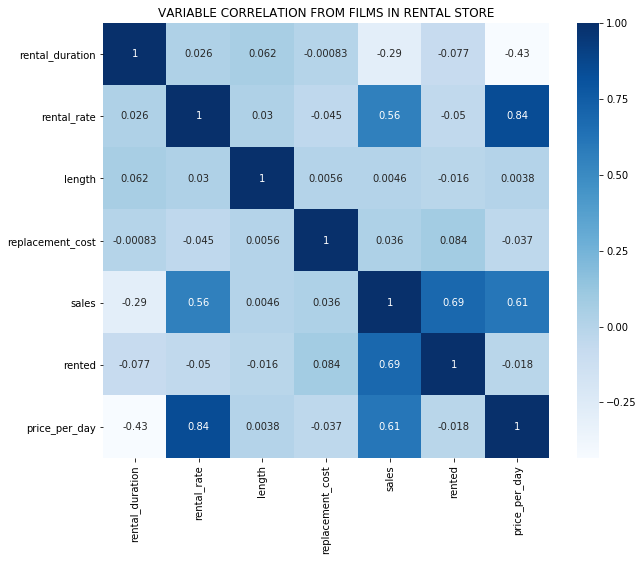

In [86]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(film.corr(), cmap='Blues', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('VARIABLE CORRELATION FROM FILMS IN RENTAL STORE')